# import

In [1]:
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd 
from os import path

In [3]:
import taproc as tp
from taproc.pre_processing import *
from taproc.dataset import *
from taproc.learner import *
from taproc.feature import *
from taproc.interpretation import *

# read file

In [4]:
file_path = Path('/media/zero/dropbox/Dropbox/Data science project/kaggle/home_credit_default_risk/data')

In [5]:
app_train = pd.read_csv(str(file_path/'application_train.csv'))

In [6]:
app_train_proc, y, na_dict = tabular_proc(app_train, y_fld = 'TARGET', max_n_cat=15)

# train test split from sklearn

In [7]:
ds = TBDataset.from_SklearnSplit(app_train_proc, y)

# baseline model

In [8]:
params = {
    'task': 'train',
    'objective': 'binary',
    'n_estimators':200,
    'learning_rate':0.05,
    'num_leaves':30,
    'colsample_bytree':.8,
    'subsample':.9,
    'max_depth':7,
    'reg_alpha':.1,
    'reg_lambda':.1,
    'min_split_gain':.01,
    'min_child_weight':2,
    'verbose':-1,
    'metric': 'binary_logloss'}

In [9]:
learner = LGBLearner()

In [10]:
learner.fit(params, *ds.trn(), *ds.val())

Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.245754	valid_1's binary_logloss: 0.248595
[200]	training's binary_logloss: 0.237841	valid_1's binary_logloss: 0.245472
Did not meet early stopping. Best iteration is:
[200]	training's binary_logloss: 0.237841	valid_1's binary_logloss: 0.245472


# dendrogram

In [15]:
ddg = Dendogram.from_df(ds.x_trn)

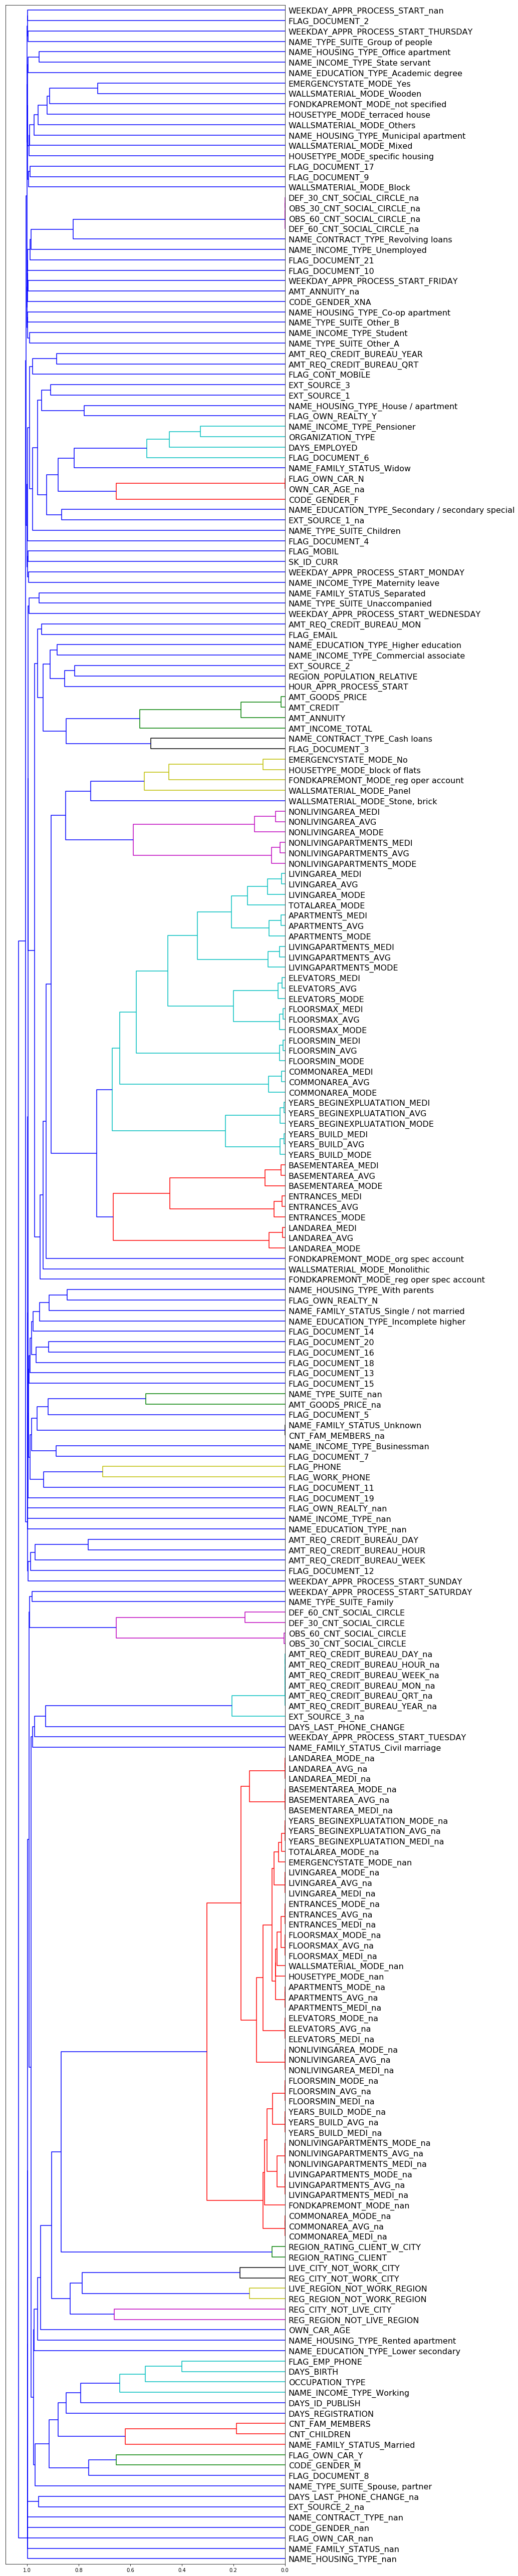

In [16]:
ddg.plot()

In [17]:
ddg.result.head(10)

col1                             col2  dist
0    AMT_REQ_CREDIT_BUREAU_HOUR_na     AMT_REQ_CREDIT_BUREAU_DAY_na   0.0
1    AMT_REQ_CREDIT_BUREAU_WEEK_na                              ---   0.0
2     AMT_REQ_CREDIT_BUREAU_MON_na                              ---   0.0
3     AMT_REQ_CREDIT_BUREAU_QRT_na                              ---   0.0
4    AMT_REQ_CREDIT_BUREAU_YEAR_na                              ---   0.0
5   YEARS_BEGINEXPLUATATION_AVG_na  YEARS_BEGINEXPLUATATION_MODE_na   0.0
6  YEARS_BEGINEXPLUATATION_MEDI_na                              ---   0.0
7                 FLOORSMAX_AVG_na                FLOORSMAX_MODE_na   0.0
8                FLOORSMAX_MEDI_na                              ---   0.0
9                 ENTRANCES_AVG_na                ENTRANCES_MODE_na   0.0

In [18]:
cluster = [['FLAG_OWN_CAR_N', 'OWN_CAR_AGE'],
     ['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY'],
     ['EMERGENCYSTATE_MODE_No', 'HOUSETYPE_MODE_block of flats'],
     ['NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI'],
     ['NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI'],
     ['LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE','TOTALAREA_MODE'],
     ['APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE'],
     ['LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI'],
     ['ELEVATORS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE'],
     ['FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE'],
     ['FLOORSMIN_AVG', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE'],
     ['COMMONAREA_AVG', 'COMMONAREA_MEDI', 'COMMONAREA_MODE'],
     ['YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE'],
     ['YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE'],
     ['BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_MODE'],
     ['ENTRANCES_AVG', 'ENTRANCES_MEDI', 'ENTRANCES_MODE'],
     ['LANDAREA_AVG', 'LANDAREA_MODE', 'LANDAREA_MEDI'],
     ['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],
     ['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE'],
     ['LANDAREA_AVG_na', 'LANDAREA_MODE_na','LANDAREA_MEDI_na'],
     ['BASEMENTAREA_AVG_na', 'BASEMENTAREA_MODE_na', 'BASEMENTAREA_MEDI_na'],
     ['AMT_REQ_CREDIT_BUREAU_HOUR_na', 'AMT_REQ_CREDIT_BUREAU_DAY_na', 
      'AMT_REQ_CREDIT_BUREAU_WEEK_na', 'AMT_REQ_CREDIT_BUREAU_MON_na', 
      'AMT_REQ_CREDIT_BUREAU_QRT_na', 'AMT_REQ_CREDIT_BUREAU_YEAR_na'],
     ['LANDAREA_AVG_na', 'LANDAREA_MODE_na', 'LANDAREA_MEDI_na'],
     ['BASEMENTAREA_AVG_na', 'BASEMENTAREA_MODE_na', 'BASEMENTAREA_MEDI_na'],
     ['YEARS_BEGINEXPLUATATION_AVG_na', 'YEARS_BEGINEXPLUATATION_MODE_na', 
      'YEARS_BEGINEXPLUATATION_MEDI_na', 'TOTALAREA_MODE_na', 'EMERGENCYSTATE_MODE_nan'],
     ['LIVINGAREA_AVG_na', 'LIVINGAREA_MODE_na', 'LIVINGAREA_MEDI_na'],
     ['ENTRANCES_AVG_na', 'ENTRANCES_MODE_na', 'ENTRANCES_MEDI_na',
      'FLOORSMAX_AVG_na', 'FLOORSMAX_MODE_na', 'FLOORSMAX_MEDI_na', 'WALLSMATERIAL_MODE_nan'],
     ['APARTMENTS_AVG_na', 'APARTMENTS_MODE_na', 'APARTMENTS_MEDI_na', 'HOUSETYPE_MODE_nan'],
     ['ELEVATORS_AVG_na', 'ELEVATORS_MODE_na', 'ELEVATORS_MEDI_na'],
     ['NONLIVINGAREA_AVG_na', 'NONLIVINGAREA_MODE_na', 'NONLIVINGAREA_MEDI_na'],
     ['FLOORSMIN_AVG_na', 'FLOORSMIN_MODE_na', 'FLOORSMIN_MEDI_na'],
     ['YEARS_BUILD_AVG_na', 'YEARS_BUILD_MODE_na', 'YEARS_BUILD_MEDI_na'],
     ['NONLIVINGAPARTMENTS_AVG_na', 'NONLIVINGAPARTMENTS_MODE_na', 'NONLIVINGAPARTMENTS_MEDI_na'],
     ['LIVINGAPARTMENTS_AVG_na', 'LIVINGAPARTMENTS_MODE_na', 'LIVINGAPARTMENTS_MEDI_na'],
     ['COMMONAREA_AVG_na', 'COMMONAREA_MODE_na', 'COMMONAREA_MEDI_na'],
     ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']]

In [19]:
group_cols = ddg.group_cols(cluster)

In [20]:
group_cols

[['FLAG_OWN_CAR_N', 'OWN_CAR_AGE'],
 ['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY'],
 ['EMERGENCYSTATE_MODE_No', 'HOUSETYPE_MODE_block of flats'],
 ['NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI'],
 ['NONLIVINGAPARTMENTS_MODE',
  'NONLIVINGAPARTMENTS_AVG',
  'NONLIVINGAPARTMENTS_MEDI'],
 ['LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE', 'TOTALAREA_MODE'],
 ['APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE'],
 ['LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI'],
 ['ELEVATORS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE'],
 ['FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE'],
 ['FLOORSMIN_AVG', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE'],
 ['COMMONAREA_AVG', 'COMMONAREA_MEDI', 'COMMONAREA_MODE'],
 ['YEARS_BEGINEXPLUATATION_AVG',
  'YEARS_BEGINEXPLUATATION_MEDI',
  'YEARS_BEGINEXPLUATATION_MODE'],
 ['YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE'],
 ['BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_MODE'],
 ['ENTRANCES_AVG', 'ENTRANCES_MEDI', 'ENTRANCES_MODE'],
 ['LANDAREA_AVG', 'LANDAREA_MODE', 'LANDAREA_MEDI'],
 ['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],
 ['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE'],
 ['LANDAREA_AVG_na', 'LANDAREA_MODE_na', 'LANDAREA_MEDI_na'],
 ['BASEMENTAREA_AVG_na', 'BASEMENTAREA_MODE_na', 'BASEMENTAREA_MEDI_na'],
 ['AMT_REQ_CREDIT_BUREAU_HOUR_na',
  'AMT_REQ_CREDIT_BUREAU_DAY_na',
  'AMT_REQ_CREDIT_BUREAU_WEEK_na',
  'AMT_REQ_CREDIT_BUREAU_MON_na',
  'AMT_REQ_CREDIT_BUREAU_QRT_na',
  'AMT_REQ_CREDIT_BUREAU_YEAR_na'],
 ['LANDAREA_AVG_na', 'LANDAREA_MODE_na', 'LANDAREA_MEDI_na'],
 ['BASEMENTAREA_AVG_na', 'BASEMENTAREA_MODE_na', 'BASEMENTAREA_MEDI_na'],
 ['YEARS_BEGINEXPLUATATION_AVG_na',
  'YEARS_BEGINEXPLUATATION_MODE_na',
  'YEARS_BEGINEXPLUATATION_MEDI_na',
  'TOTALAREA_MODE_na',
  'EMERGENCYSTATE_MODE_nan'],
 ['LIVINGAREA_AVG_na', 'LIVINGAREA_MODE_na', 'LIVINGAREA_MEDI_na'],
 ['ENTRANCES_AVG_na',
  'ENTRANCES_MODE_na',
  'ENTRANCES_MEDI_na',
  'FLOORSMAX_AVG_na',
  'FLOORSMAX_MODE_na',
  'FLOORSMAX_MEDI_na',
  'WALLSMATERIAL_MODE_nan'],
 ['APARTMENTS_AVG_na',
  'APARTMENTS_MODE_na',
  'APARTMENTS_MEDI_na',
  'HOUSETYPE_MODE_nan'],
 ['ELEVATORS_AVG_na', 'ELEVATORS_MODE_na', 'ELEVATORS_MEDI_na'],
 ['NONLIVINGAREA_AVG_na', 'NONLIVINGAREA_MODE_na', 'NONLIVINGAREA_MEDI_na'],
 ['FLOORSMIN_AVG_na', 'FLOORSMIN_MODE_na', 'FLOORSMIN_MEDI_na'],
 ['YEARS_BUILD_AVG_na', 'YEARS_BUILD_MODE_na', 'YEARS_BUILD_MEDI_na'],
 ['NONLIVINGAPARTMENTS_AVG_na',
  'NONLIVINGAPARTMENTS_MODE_na',
  'NONLIVINGAPARTMENTS_MEDI_na'],
 ['LIVINGAPARTMENTS_AVG_na',
  'LIVINGAPARTMENTS_MODE_na',
  'LIVINGAPARTMENTS_MEDI_na'],
 ['COMMONAREA_AVG_na', 'COMMONAREA_MODE_na', 'COMMONAREA_MEDI_na'],
 ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'],
 'SK_ID_CURR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_ANNUITY_na',
 'AMT_GOOD

# feature importance

In [21]:
impt = Importance.from_Learner(learner, ds, group_cols)

In [22]:
impt.I[:5]

Feature  Importance
62                                EXT_SOURCE_3    0.058051
61                                EXT_SOURCE_2    0.046095
1   AMT_GOODS_PRICE & AMT_CREDIT & AMT_ANNUITY    0.020351
60                                EXT_SOURCE_1    0.017711
40                                  DAYS_BIRTH    0.006564

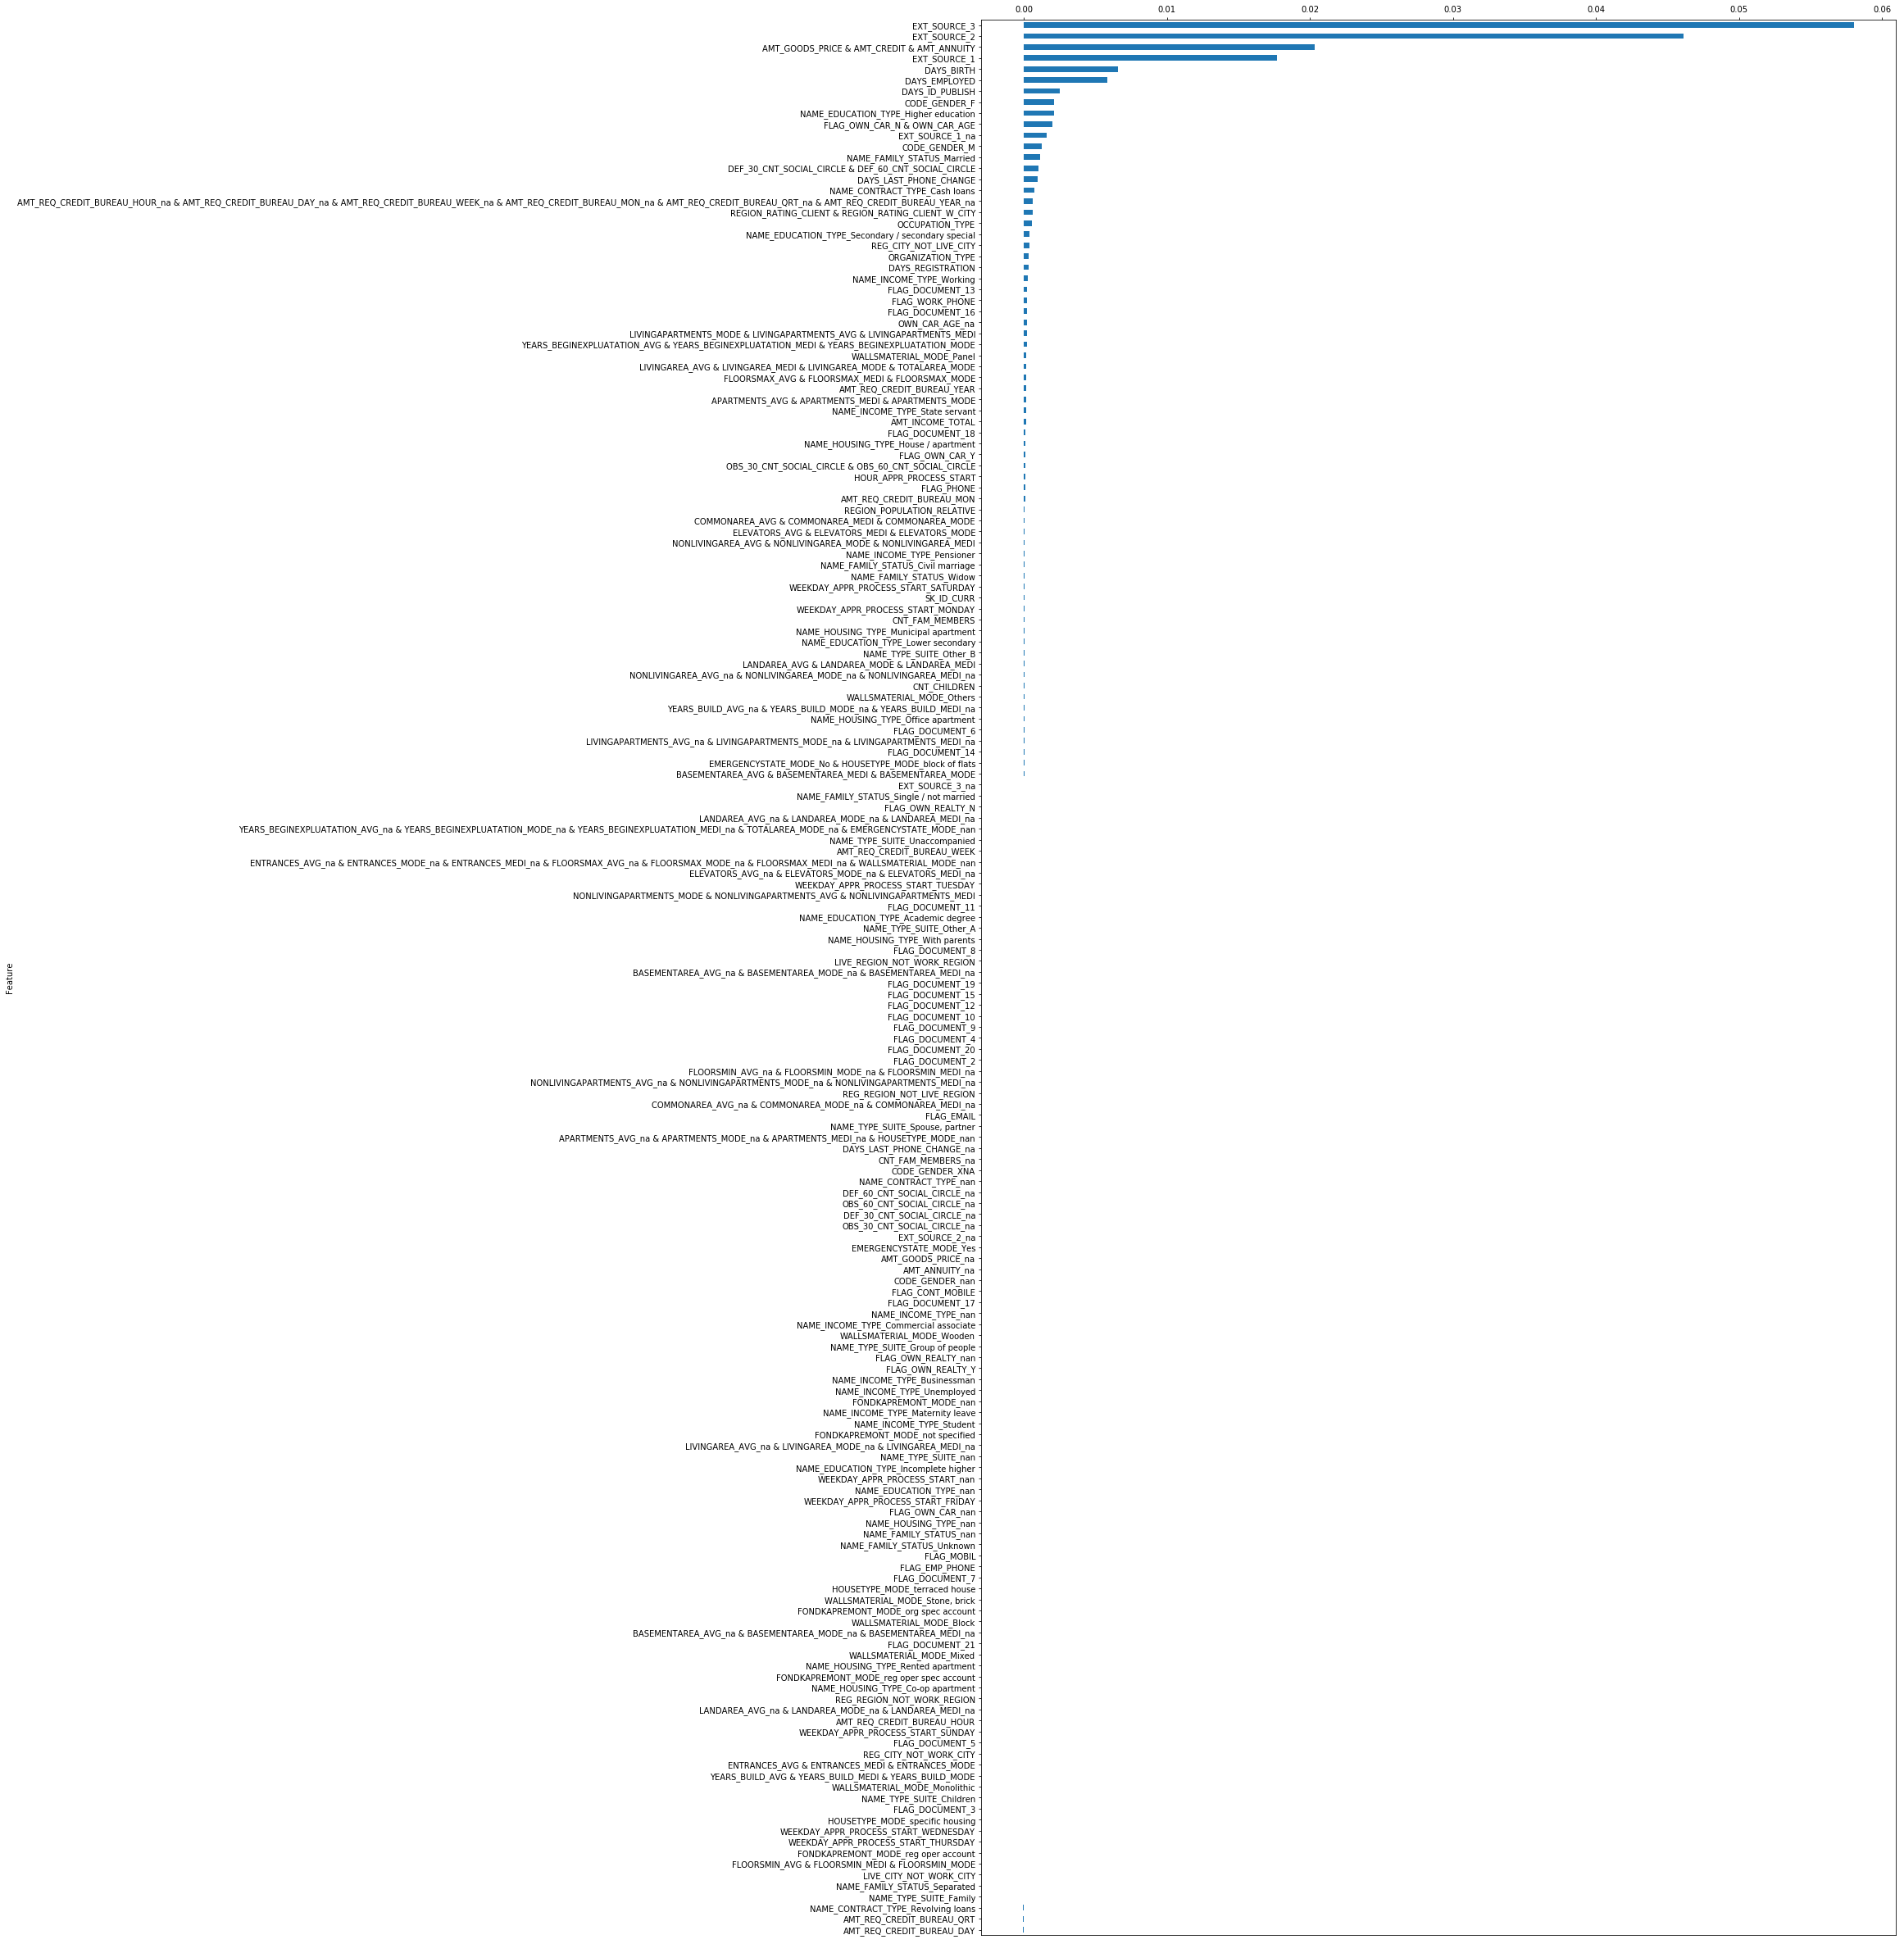

In [23]:
impt.plot()

In [26]:
impt.top(28)

[['EXT_SOURCE_3'],
 ['EXT_SOURCE_2'],
 ['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY'],
 ['EXT_SOURCE_1'],
 ['DAYS_BIRTH'],
 ['DAYS_EMPLOYED'],
 ['DAYS_ID_PUBLISH'],
 ['CODE_GENDER_F'],
 ['NAME_EDUCATION_TYPE_Higher education'],
 ['FLAG_OWN_CAR_N', 'OWN_CAR_AGE'],
 ['EXT_SOURCE_1_na'],
 ['CODE_GENDER_M'],
 ['NAME_FAMILY_STATUS_Married'],
 ['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],
 ['DAYS_LAST_PHONE_CHANGE'],
 ['NAME_CONTRACT_TYPE_Cash loans'],
 ['AMT_REQ_CREDIT_BUREAU_HOUR_na',
  'AMT_REQ_CREDIT_BUREAU_DAY_na',
  'AMT_REQ_CREDIT_BUREAU_WEEK_na',
  'AMT_REQ_CREDIT_BUREAU_MON_na',
  'AMT_REQ_CREDIT_BUREAU_QRT_na',
  'AMT_REQ_CREDIT_BUREAU_YEAR_na'],
 ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'],
 ['OCCUPATION_TYPE'],
 ['NAME_EDUCATION_TYPE_Secondary / secondary special'],
 ['REG_CITY_NOT_LIVE_CITY'],
 ['ORGANIZATION_TYPE'],
 ['DAYS_REGISTRATION'],
 ['NAME_INCOME_TYPE_Working'],
 ['FLAG_DOCUMENT_13'],
 ['FLAG_WORK_PHONE'],
 ['FLAG_DOCUMENT_16'],
 ['OWN_CAR_AGE_na']]

In [27]:
ds.keep(flat_list(impt.top(28)))

In [11]:
impt_ft = [['EXT_SOURCE_3'], ['EXT_SOURCE_2'], ['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY'], ['EXT_SOURCE_1'], ['DAYS_BIRTH'], ['DAYS_EMPLOYED'], ['DAYS_ID_PUBLISH'], ['CODE_GENDER_F'], ['NAME_EDUCATION_TYPE_Higher education'], ['FLAG_OWN_CAR_N', 'OWN_CAR_AGE'], ['EXT_SOURCE_1_na'], ['CODE_GENDER_M'], ['NAME_FAMILY_STATUS_Married'], ['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'], ['DAYS_LAST_PHONE_CHANGE'], ['NAME_CONTRACT_TYPE_Cash loans'], ['AMT_REQ_CREDIT_BUREAU_HOUR_na', 'AMT_REQ_CREDIT_BUREAU_DAY_na', 'AMT_REQ_CREDIT_BUREAU_WEEK_na', 'AMT_REQ_CREDIT_BUREAU_MON_na', 'AMT_REQ_CREDIT_BUREAU_QRT_na', 'AMT_REQ_CREDIT_BUREAU_YEAR_na'], ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'], ['OCCUPATION_TYPE'], ['NAME_EDUCATION_TYPE_Secondary / secondary special'], ['REG_CITY_NOT_LIVE_CITY'], ['ORGANIZATION_TYPE'], ['DAYS_REGISTRATION'], ['NAME_INCOME_TYPE_Working'], ['FLAG_DOCUMENT_13'], ['FLAG_WORK_PHONE'], ['FLAG_DOCUMENT_16'], ['OWN_CAR_AGE_na']]

In [12]:
ds.keep(flat_list(impt_ft))

# feature selection

In [13]:
ddg = Dendogram.from_df(ds.x_trn)

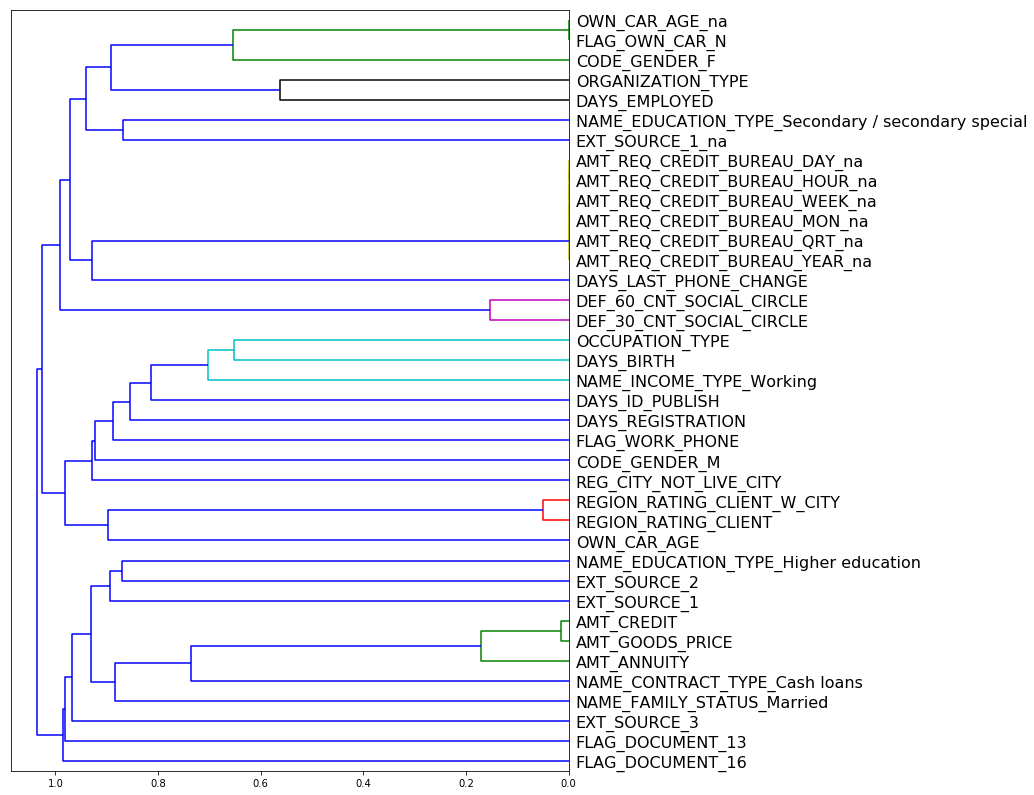

In [14]:
ddg.plot()

In [13]:
cluster = [#['YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE'],
            ['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY'],
            ['AMT_REQ_CREDIT_BUREAU_HOUR_na', 'AMT_REQ_CREDIT_BUREAU_DAY_na', 
            'AMT_REQ_CREDIT_BUREAU_WEEK_na', 'AMT_REQ_CREDIT_BUREAU_MON_na', 
            'AMT_REQ_CREDIT_BUREAU_QRT_na', 'AMT_REQ_CREDIT_BUREAU_YEAR_na'],
            ['FLAG_OWN_CAR_N', 'OWN_CAR_AGE'],
            ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'],
            ['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']]

In [14]:
for cols in cluster:    
    for col in cols:
        print(col)
        params = {  'task': 'train',
                    'objective': 'binary',
                    'n_estimators':100,
                    'learning_rate':0.05,
                    'num_leaves':30,
                    'colsample_bytree':.8,
                    'subsample':.9,
                    'max_depth':7,
                    'reg_alpha':.1,
                    'reg_lambda':.1,
                    'min_split_gain':.01,
                    'min_child_weight':2,
                    'verbose':1,
                    'metric': 'binary_logloss'}
        learner.fit(params, *ds.drop(col, inplace=False), *ds.drop(col, inplace=False, tp = 'val'), 
                    early_stopping_rounds=50, verbose_eval=1000)
    print('\n')

AMT_GOODS_PRICE
Training until validation scores don't improve for 50 rounds.
Did not meet early stopping. Best iteration is:
[100]	training's binary_logloss: 0.246731	valid_1's binary_logloss: 0.249483
AMT_CREDIT
Training until validation scores don't improve for 50 rounds.
Did not meet early stopping. Best iteration is:
[100]	training's binary_logloss: 0.246251	valid_1's binary_logloss: 0.248798
AMT_ANNUITY
Training until validation scores don't improve for 50 rounds.
Did not meet early stopping. Best iteration is:
[100]	training's binary_logloss: 0.246301	valid_1's binary_logloss: 0.248771


AMT_REQ_CREDIT_BUREAU_HOUR_na
Training until validation scores don't improve for 50 rounds.
Did not meet early stopping. Best iteration is:
[100]	training's binary_logloss: 0.245996	valid_1's binary_logloss: 0.248598
AMT_REQ_CREDIT_BUREAU_DAY_na
Training until validation scores don't improve for 50 rounds.
Did not meet early stopping. Best iteration is:
[100]	training's binary_logloss: 0.245996	

In [15]:
#'YEARS_BEGINEXPLUATATION_MODE',
ds.drop(['AMT_REQ_CREDIT_BUREAU_HOUR_na', 'AMT_REQ_CREDIT_BUREAU_DAY_na', 
        'AMT_REQ_CREDIT_BUREAU_WEEK_na', 'AMT_REQ_CREDIT_BUREAU_MON_na', 
        'AMT_REQ_CREDIT_BUREAU_QRT_na', 'AMT_REQ_CREDIT_BUREAU_YEAR_na'])

# try new features

## original

In [16]:
params = {
    'task': 'train',
    'objective': 'binary',
    'n_estimators':200,
    'learning_rate':0.05,
    'num_leaves':30,
    'colsample_bytree':.8,
    'subsample':.9,
    'max_depth':7,
    'reg_alpha':.1,
    'reg_lambda':.1,
    'min_split_gain':.01,
    'min_child_weight':2,
    'verbose':-1,
    'metric': 'binary_logloss'}
learner.fit(params, *ds.trn(), *ds.val(), early_stopping_rounds=100, verbose_eval = 100)

Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.246252	valid_1's binary_logloss: 0.248631
[200]	training's binary_logloss: 0.239409	valid_1's binary_logloss: 0.245678
Did not meet early stopping. Best iteration is:
[200]	training's binary_logloss: 0.239409	valid_1's binary_logloss: 0.245678


In [17]:
Shap = SHAP.from_Tree(learner, ds)

In [18]:
Shap.force_plot_one(1)

## list of features

In [ ]:
#df['NEW_EXT_SOURCES_MEAN'] = df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1, skipna=True)

#df['NEW_EXT_SOURCES_GEO'] = df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].apply(geometric_mean, axis=1)
#df['NEW_CREDIT_TO_ANNUITY_RATIO'] = df['AMT_CREDIT'] / df['AMT_ANNUITY']
#df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']

#df['NEW_CREDIT_TO_GOODS_RATIO'] = df['AMT_CREDIT'] / df['AMT_GOODS_PRICE']

df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']


X['cnt_non_child'] = X['CNT_FAM_MEMBERS'] - X['CNT_CHILDREN']
X['child_to_non_child_ratio'] = X['CNT_CHILDREN'] / X['cnt_non_child']
X['income_per_non_child'] = X['AMT_INCOME_TOTAL'] / X['cnt_non_child']
X['credit_per_person'] = X['AMT_CREDIT'] / X['CNT_FAM_MEMBERS']
X['credit_per_child'] = X['AMT_CREDIT'] / (1 + X['CNT_CHILDREN'])
X['credit_per_non_child'] = X['AMT_CREDIT'] / X['cnt_non_child']


In [ ]:
df['EXT_SOURCE_3^2 DAYS_BIRTH'] = df['EXT_SOURCE_3'] * df['EXT_SOURCE_3'] * df['DAYS_BIRTH']
df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
df['EXT_SOURCE_1 EXT_SOURCE_3'] = df['EXT_SOURCE_1'] * df['EXT_SOURCE_3']


In [ ]:
X['annuity_income_percentage'] = X['AMT_ANNUITY'] / X['AMT_INCOME_TOTAL']
X['car_to_birth_ratio'] = X['OWN_CAR_AGE'] / X['DAYS_BIRTH']
X['car_to_employ_ratio'] = X['OWN_CAR_AGE'] / X['DAYS_EMPLOYED']
X['children_ratio'] = X['CNT_CHILDREN'] / X['CNT_FAM_MEMBERS']
X['credit_to_annuity_ratio'] = X['AMT_CREDIT'] / X['AMT_ANNUITY']
X['credit_to_goods_ratio'] = X['AMT_CREDIT'] / X['AMT_GOODS_PRICE']
X['credit_to_income_ratio'] = X['AMT_CREDIT'] / X['AMT_INCOME_TOTAL']
X['days_employed_percentage'] = X['DAYS_EMPLOYED'] / X['DAYS_BIRTH']
X['ext_sources_mean'] = X[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
X['income_credit_percentage'] = X['AMT_INCOME_TOTAL'] / X['AMT_CREDIT']
X['income_per_child'] = X['AMT_INCOME_TOTAL'] / (1 + X['CNT_CHILDREN'])
X['income_per_person'] = X['AMT_INCOME_TOTAL'] / X['CNT_FAM_MEMBERS']
X['payment_rate'] = X['AMT_ANNUITY'] / X['AMT_CREDIT']
X['phone_to_birth_ratio'] = X['DAYS_LAST_PHONE_CHANGE'] / X['DAYS_BIRTH']
X['phone_to_employ_ratio'] = X['DAYS_LAST_PHONE_CHANGE'] / X['DAYS_EMPLOYED']

In [173]:
ds.add('DAYS_BIRTH_DAYS_EMPLOYED_2', lambda df: df['DAYS_BIRTH']/df['DAYS_EMPLOYED'])

## begin

### NEW_EXT_SOURCES_MEAN

In [19]:
ds.apply('NEW_EXT_SOURCES_MEAN', 
       lambda df: df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1, skipna=True))

In [22]:
params = {
    'task': 'train',
    'objective': 'binary',
    'n_estimators':200,
    'learning_rate':0.05,
    'num_leaves':30,
    'colsample_bytree':.8,
    'subsample':.9,
    'max_depth':7,
    'reg_alpha':.1,
    'reg_lambda':.1,
    'min_split_gain':.01,
    'min_child_weight':2,
    'verbose':-1,
    'metric': 'binary_logloss'}
learner.fit(params, *ds.trn(), *ds.val(), early_stopping_rounds=100, verbose_eval = 100)

Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.245805	valid_1's binary_logloss: 0.24805
[200]	training's binary_logloss: 0.239139	valid_1's binary_logloss: 0.245517
Did not meet early stopping. Best iteration is:
[200]	training's binary_logloss: 0.239139	valid_1's binary_logloss: 0.245517


In [23]:
Shap2 = SHAP.from_Tree(learner, ds)

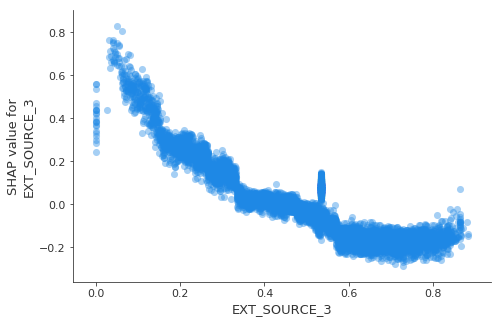

In [28]:
Shap2.dependence_plot('EXT_SOURCE_3', None, alpha=0.4)

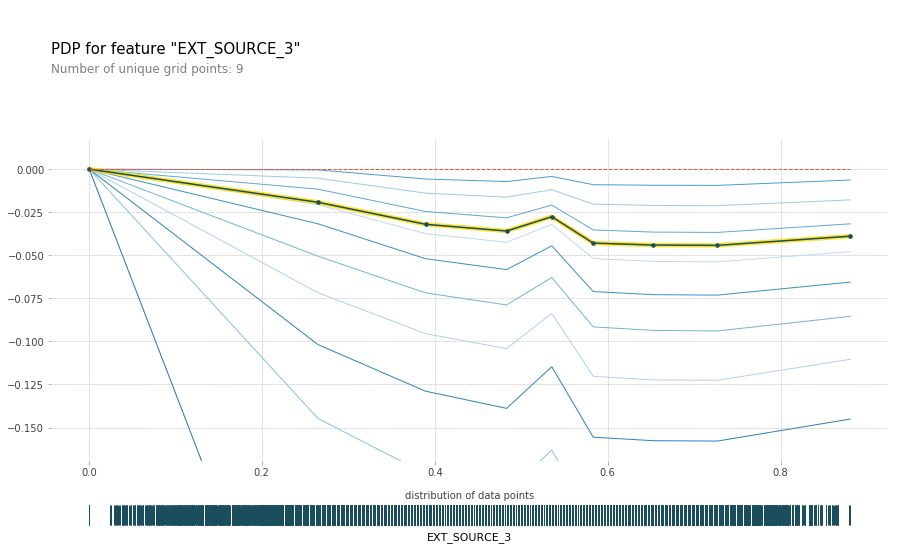

In [30]:
pdpd.isolate('EXT_SOURCE_3')

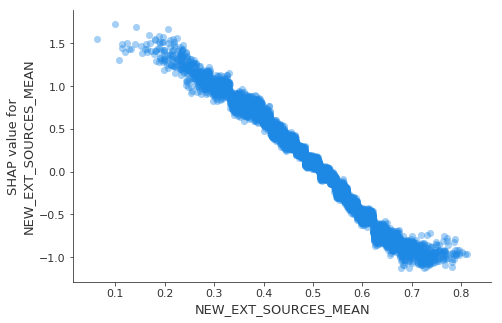

In [25]:
Shap2.dependence_plot('NEW_EXT_SOURCES_MEAN', None, alpha=0.4)

In [26]:
pdpd = PartialDependence.from_Learner(learner, ds)

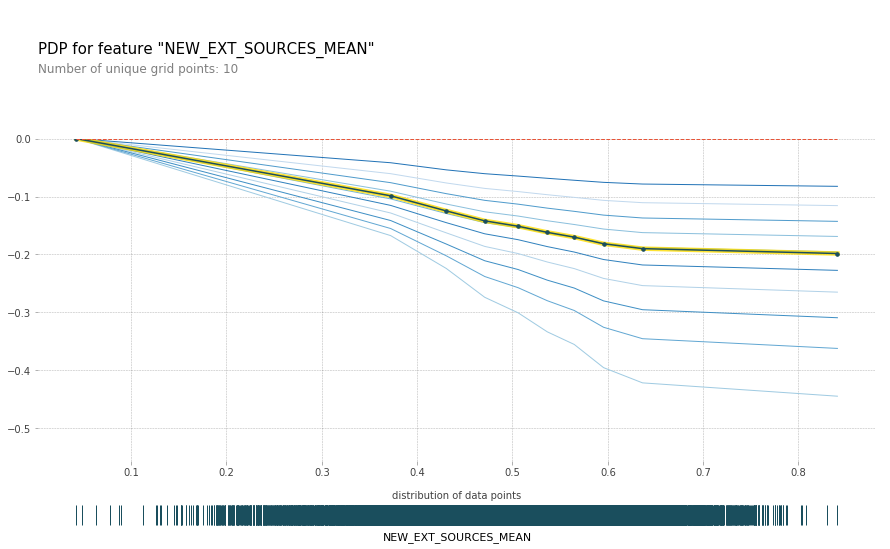

In [29]:
pdpd.isolate('NEW_EXT_SOURCES_MEAN')

In [ ]:
pdpd.pdp_interact(['EXT_SOURCE_3', 'EXT_SOURCE_2'], plot_types='contour' )

### NEW_EXT_SOURCES_GEO

In [280]:
ds.add('NEW_EXT_SOURCES_GEO', lambda df: (df['EXT_SOURCE_1']*df['EXT_SOURCE_2']*df['EXT_SOURCE_3'])**(1/3))

In [281]:
params = {
    'task': 'train',
    'objective': 'binary',
    'n_estimators':200,
    'learning_rate':0.05,
    'num_leaves':30,
    'colsample_bytree':.8,
    'subsample':.9,
    'max_depth':7,
    'reg_alpha':.1,
    'reg_lambda':.1,
    'min_split_gain':.01,
    'min_child_weight':2,
    'verbose':-1,
    'metric': 'binary_logloss'}
learner.fit(params, *ds.trn_n_val(), early_stopping_rounds=100, verbose_eval = 100)

Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.245371	valid_1's binary_logloss: 0.249099
[200]	training's binary_logloss: 0.23916	valid_1's binary_logloss: 0.246949
Did not meet early stopping. Best iteration is:
[200]	training's binary_logloss: 0.23916	valid_1's binary_logloss: 0.246949


In [282]:
Shap2 = SHAP.from_Tree(learner, ds)

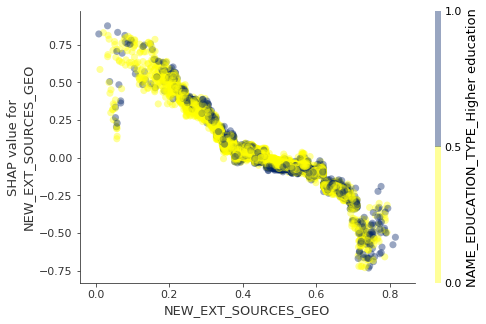

In [283]:
Shap2.dependence_plot('NEW_EXT_SOURCES_GEO', alpha=0.4)

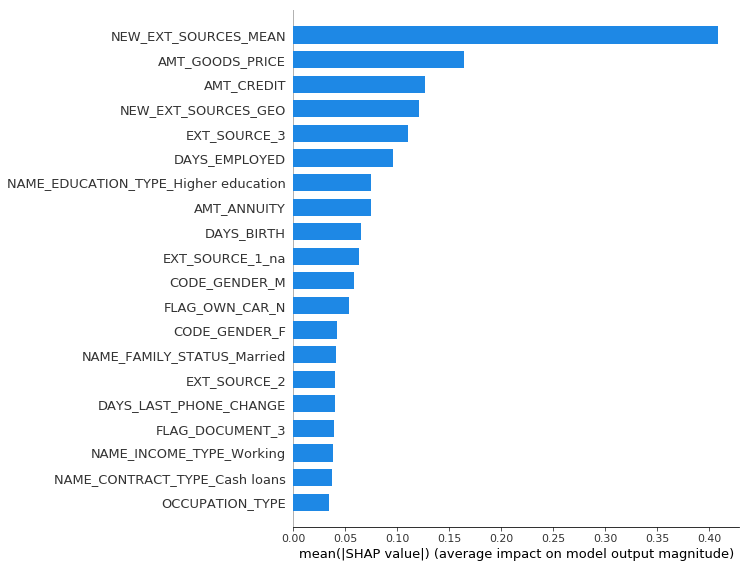

In [284]:
Shap2.importance_plot()

### NEW_CREDIT_TO_ANNUITY_RATIO

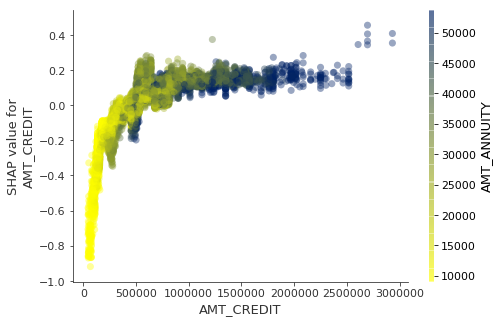

In [285]:
Shap2.dependence_plot('AMT_CREDIT', 'AMT_ANNUITY', alpha=0.4)

In [288]:
ds.add('NEW_CREDIT_TO_ANNUITY_RATIO', lambda df: df['AMT_CREDIT'] / df['AMT_ANNUITY'])

In [290]:
params = {
    'task': 'train',
    'objective': 'binary',
    'n_estimators':200,
    'learning_rate':0.05,
    'num_leaves':30,
    'colsample_bytree':.8,
    'subsample':.9,
    'max_depth':7,
    'reg_alpha':.1,
    'reg_lambda':.1,
    'min_split_gain':.01,
    'min_child_weight':2,
    'verbose':-1,
    'metric': 'binary_logloss'}
learner.fit(params, *ds.trn_n_val(), early_stopping_rounds=100, verbose_eval = 100)

Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.244244	valid_1's binary_logloss: 0.247752
[200]	training's binary_logloss: 0.237204	valid_1's binary_logloss: 0.244511
Did not meet early stopping. Best iteration is:
[200]	training's binary_logloss: 0.237204	valid_1's binary_logloss: 0.244511


In [ ]:
Shap2 = SHAP.from_Tree(learner, ds)

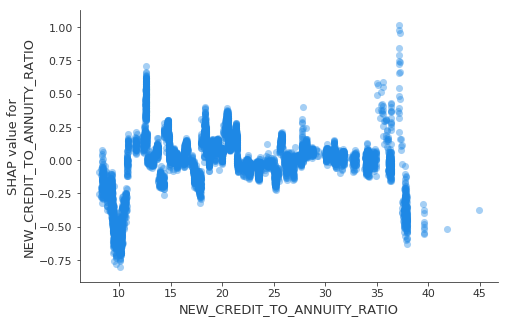

In [295]:
Shap2.dependence_plot('NEW_CREDIT_TO_ANNUITY_RATIO', None, alpha=0.4)

### NEW_CREDIT_TO_GOODS_RATIO

In [297]:
ds.add('NEW_CREDIT_TO_GOODS_RATIO', lambda df: df['AMT_CREDIT']/df['AMT_GOODS_PRICE'])

In [298]:
params = {
    'task': 'train',
    'objective': 'binary',
    'n_estimators':200,
    'learning_rate':0.05,
    'num_leaves':30,
    'colsample_bytree':.8,
    'subsample':.9,
    'max_depth':7,
    'reg_alpha':.1,
    'reg_lambda':.1,
    'min_split_gain':.01,
    'min_child_weight':2,
    'verbose':-1,
    'metric': 'binary_logloss'}
learner.fit(params, *ds.trn_n_val(), early_stopping_rounds=100, verbose_eval = 100)

Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.243967	valid_1's binary_logloss: 0.247954
[200]	training's binary_logloss: 0.236999	valid_1's binary_logloss: 0.24484
Did not meet early stopping. Best iteration is:
[200]	training's binary_logloss: 0.236999	valid_1's binary_logloss: 0.24484


In [299]:
Shap2 = SHAP.from_Tree(learner, ds)

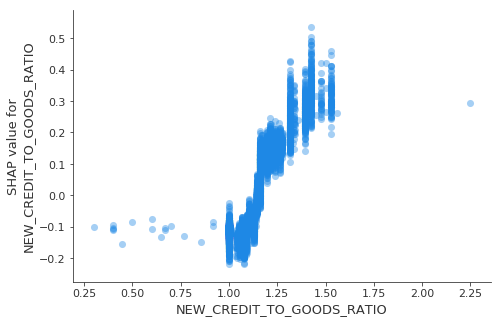

In [301]:
Shap2.dependence_plot('NEW_CREDIT_TO_GOODS_RATIO', None, alpha=0.4)

### DAYS_BIRTH_DAYS_EMPLOYED

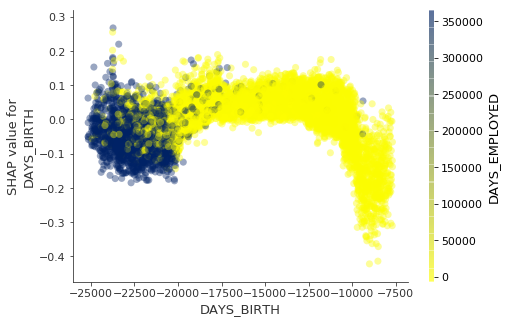

In [311]:
Shap2.dependence_plot('DAYS_BIRTH' , 'DAYS_EMPLOYED', alpha=0.4)

In [29]:
ds.apply('DAYS_BIRTH_DAYS_EMPLOYED', lambda df: df['DAYS_BIRTH']/df['DAYS_EMPLOYED'])

In [30]:
params = {
    'task': 'train',
    'objective': 'binary',
    'n_estimators':200,
    'learning_rate':0.05,
    'num_leaves':30,
    'colsample_bytree':.8,
    'subsample':.9,
    'max_depth':7,
    'reg_alpha':.1,
    'reg_lambda':.1,
    'min_split_gain':.01,
    'min_child_weight':2,
    'verbose':-1,
    'metric': 'binary_logloss'}
learner.fit(params, *ds.trn_n_val(), early_stopping_rounds=100, verbose_eval = 100)

Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.245248	valid_1's binary_logloss: 0.250471
[200]	training's binary_logloss: 0.237381	valid_1's binary_logloss: 0.247327
Did not meet early stopping. Best iteration is:
[200]	training's binary_logloss: 0.237381	valid_1's binary_logloss: 0.247327


In [31]:
Shap2 = SHAP.from_Tree(learner, ds)

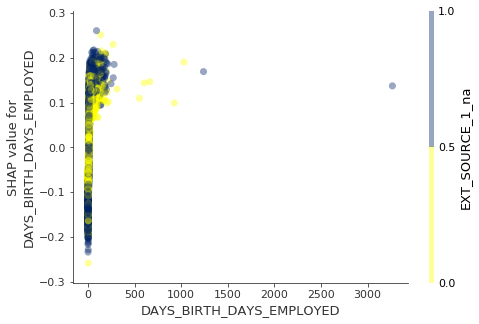

In [32]:
Shap2.dependence_plot('DAYS_BIRTH_DAYS_EMPLOYED', alpha=0.4)

### EXT_SOURCE_3_DAYS_BIRTH

In [34]:
Shap2.force_plot_one(1)

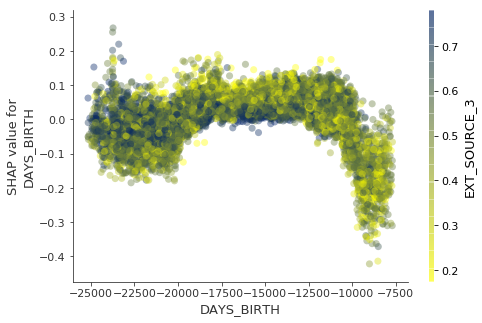

In [306]:
Shap2.dependence_plot('DAYS_BIRTH' , 'EXT_SOURCE_3', alpha=0.4)

### DAYS_BIRTH_CODE_GENDER_M

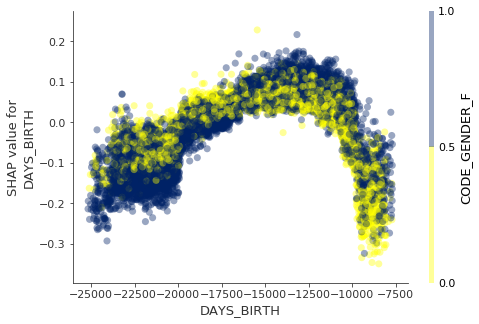

In [25]:
Shap2.dependence_plot('DAYS_BIRTH' , 'CODE_GENDER_F', alpha=0.4)

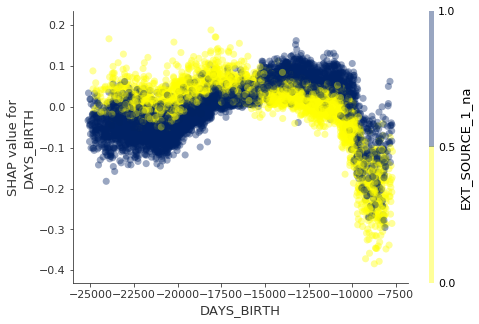

In [324]:
Shap2.dependence_plot('DAYS_BIRTH' , 'EXT_SOURCE_1_na', alpha=0.4)

In [369]:
ds.add('DAYS_BIRTH_EXT_SOURCE_1_na', lambda df: df['DAYS_BIRTH']*(df['EXT_SOURCE_1_na']+0.2))

In [338]:
params = {
    'task': 'train',
    'objective': 'binary',
    'n_estimators':200,
    'learning_rate':0.05,
    'num_leaves':30,
    'colsample_bytree':.8,
    'subsample':.9,
    'max_depth':7,
    'reg_alpha':.1,
    'reg_lambda':.1,
    'min_split_gain':.01,
    'min_child_weight':2,
    'verbose':-1,
    'metric': 'binary_logloss'}
learner.fit(params, *ds.trn_n_val(), early_stopping_rounds=100, verbose_eval = 100)

Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.243671	valid_1's binary_logloss: 0.247688
[200]	training's binary_logloss: 0.236729	valid_1's binary_logloss: 0.244832
Did not meet early stopping. Best iteration is:
[200]	training's binary_logloss: 0.236729	valid_1's binary_logloss: 0.244832


In [339]:
Shap2 = SHAP.from_Tree(learner, ds)

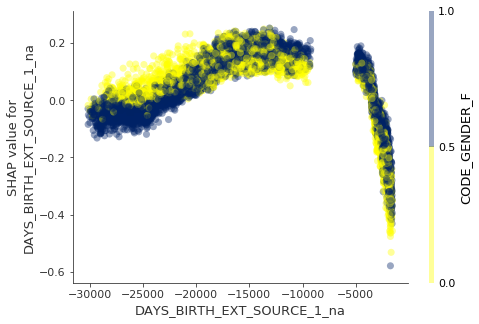

In [340]:
Shap2.dependence_plot('DAYS_BIRTH_EXT_SOURCE_1_na' , alpha=0.4)

In [375]:
ds.add('DAYS_BIRTH_EXT_SOURCE_1_na_CODE_GENDER_M', 
       lambda df: df['DAYS_BIRTH']*(df['EXT_SOURCE_1_na'] + 0.2)*(df['CODE_GENDER_M']+0.2))

In [376]:
params = {
    'task': 'train',
    'objective': 'binary',
    'n_estimators':200,
    'learning_rate':0.05,
    'num_leaves':30,
    'colsample_bytree':.8,
    'subsample':.9,
    'max_depth':7,
    'reg_alpha':.1,
    'reg_lambda':.1,
    'min_split_gain':.01,
    'min_child_weight':2,
    'verbose':-1,
    'metric': 'binary_logloss'}
learner.fit(params, *ds.trn_n_val(), early_stopping_rounds=100, verbose_eval = 100)

Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.243585	valid_1's binary_logloss: 0.247545
[200]	training's binary_logloss: 0.236651	valid_1's binary_logloss: 0.244681
Did not meet early stopping. Best iteration is:
[200]	training's binary_logloss: 0.236651	valid_1's binary_logloss: 0.244681


In [377]:
Shap2 = SHAP.from_Tree(learner, ds)

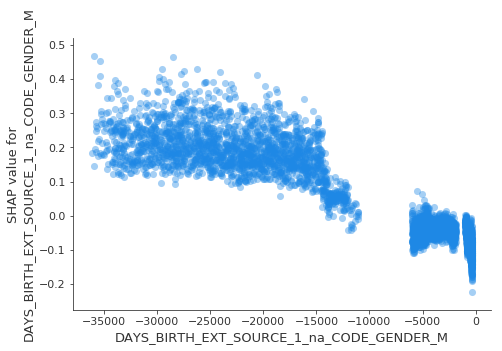

In [380]:
Shap2.dependence_plot('DAYS_BIRTH_EXT_SOURCE_1_na_CODE_GENDER_M' , None, alpha=0.4)

### EXT_SOURCE_3^2 DAYS_BIRTH

In [385]:
ds.drop_inplace('EXT_SOURCE_3^2 DAYS_BIRTH')

In [386]:
ds.add('EXT_SOURCE_3_DAYS_BIRTH', lambda df:  df['EXT_SOURCE_3'] * df['DAYS_BIRTH'])

In [ ]:
236591

In [387]:
params = {
    'task': 'train',
    'objective': 'binary',
    'n_estimators':200,
    'learning_rate':0.05,
    'num_leaves':30,
    'colsample_bytree':.8,
    'subsample':.9,
    'max_depth':7,
    'reg_alpha':.1,
    'reg_lambda':.1,
    'min_split_gain':.01,
    'min_child_weight':2,
    'verbose':-1,
    'metric': 'binary_logloss'}
learner.fit(params, *ds.trn_n_val(), early_stopping_rounds=100, verbose_eval = 100)

Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.243538	valid_1's binary_logloss: 0.247461
[200]	training's binary_logloss: 0.236563	valid_1's binary_logloss: 0.244697
Did not meet early stopping. Best iteration is:
[200]	training's binary_logloss: 0.236563	valid_1's binary_logloss: 0.244697


In [388]:
Shap2 = SHAP.from_Tree(learner, ds)

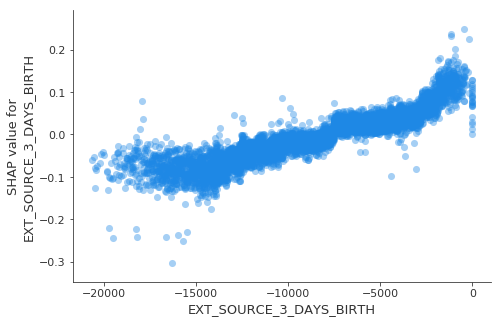

In [389]:
Shap2.dependence_plot('EXT_SOURCE_3_DAYS_BIRTH' , None, alpha=0.4)

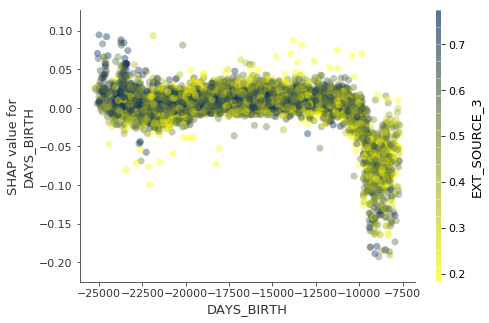

In [392]:
Shap2.dependence_plot('DAYS_BIRTH', 'EXT_SOURCE_3', alpha=0.4)

In [ ]:
df['EXT_SOURCE_3^2 DAYS_BIRTH'] = df['EXT_SOURCE_3'] * df['EXT_SOURCE_3'] * df['DAYS_BIRTH']

In [333]:
ds.add('DAYS_BIRTH_EXT_SOURCE_1_na', 
       lambda df: df['DAYS_BIRTH']*(df['EXT_SOURCE_1_na']+0.2)*(df['CODE_GENDER_M']+0.2))

In [ ]:
EXT_SOURCE_1_na
CODE_GENDER_M